In [11]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START
from langgraph.graph.message import add_messages

# 1. Create a StateGraph
class State(TypedDict):
    messages: Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [16]:
# 2. Add a node
from langchain.chat_models import init_chat_model
from dotenv import load_dotenv
import os 

load_dotenv()

os.environ["GOOGLE_API_KEY"] = os.getenv('GOOGLE_API_KEY')

llm = init_chat_model("google_genai:gemini-2.0-flash")

In [ ]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [21]:
# 3. Add an entry point 
# Add an entry point to tell the graph where to start its work each time it is run:
graph_builder.add_edge(START,"chatbot")

In [22]:
# 5. Compile the graph 
graph = graph_builder.compile()

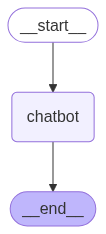

In [32]:
# Visualize the graph(optional)
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Error: {e}")

In [ ]:
# Run the chatbot 
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User:  i think its a agentic ai library


Assistant: Okay, I understand you're thinking about agentic AI libraries. To help you further, I need a little more information.  Could you tell me more about what you're looking for?  For example:

*   **What do you want to *do* with an agentic AI library?** Are you trying to build autonomous agents for:
    *   Task automation?
    *   Research and development?
    *   Game playing?
    *   Something else entirely?

*   **What programming language are you using?** (Python is the most common, but there are options in other languages too).

*   **What's your level of experience with AI and programming?** Are you a beginner, intermediate, or advanced user?

*   **What features are most important to you?** (e.g., ease of use, performance, flexibility, specific tools or algorithms)

In the meantime, here are some of the *most popular* and discussed agentic AI libraries, primarily focused on Python, along with a brief overview:

**Popular Agentic AI Libraries (Primarily Python):**

*   **L

User:  primarily in python


Assistant: Okay, I'm ready to help you with Python. To give you the best assistance, please tell me what you'd like to do.  For example, you could ask me to:

*   **Write a specific function or program:**  "Write a Python function that takes a list of numbers and returns the average."
*   **Explain a concept:** "Explain how to use list comprehensions in Python."
*   **Help you debug code:** "I have this Python code, and it's giving me an error. Can you help me find the problem?"
*   **Suggest libraries for a task:** "I want to build a web scraper in Python. What libraries should I use?"
*   **Give examples:** "Can you give me an example of using the `try...except` block in Python?"
*   **Convert code from another language to Python:** "Can you convert this JavaScript code to Python?"
*   **Optimize Python code:** "Can you help me optimize this Python code for speed?"
*   **Solve a coding challenge:** "I'm working on a coding challenge, and I'm stuck. Can you help me?"

The more specifi

User:  give me simple code in the class named AWSStorage to upload file into the  s3 bucket 


Assistant: ```python
import boto3
import os

class AWSStorage:
    """
    A simple class for uploading files to an AWS S3 bucket.
    """

    def __init__(self, bucket_name, region_name, access_key, secret_key):
        """
        Initializes the AWSStorage object.

        Args:
            bucket_name (str): The name of the S3 bucket.
            region_name (str): The AWS region the bucket is in (e.g., 'us-east-1').
            access_key (str): Your AWS access key ID.
            secret_key (str): Your AWS secret access key.
        """
        self.bucket_name = bucket_name
        self.region_name = region_name
        self.access_key = access_key
        self.secret_key = secret_key
        self.s3_client = boto3.client(
            's3',
            region_name=self.region_name,
            aws_access_key_id=self.access_key,
            aws_secret_access_key=self.secret_key
        )

    def upload_file(self, file_path, s3_key):
        """
        Uploads a file to the S3 